In [1]:
# Natural language processing to extract information from the node's fs module documentation
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [14]:
from bs4 import BeautifulSoup
import urllib.request

response = urllib.request.urlopen('https://github.com/nodejs/node/blob/master/doc/api/fs.md')
html = response.read()
soup = BeautifulSoup(html,'html.parser')
text = soup.get_text(strip=True)
print(text)

ing|Buffer|URL} source filename to copydest{string|Buffer|URL} destination filename of the copy operationmode{integer} modifiers for copy operation.Default:0.Returns: {Promise}Asynchronously copiessrctodest. By default,destis overwritten if it
already exists. ThePromisewill be resolved with no arguments upon success.Node.js makes no guarantees about the atomicity of the copy operation. If an
error occurs after the destination file has been opened for writing, Node.js
will attempt to remove the destination.modeis an optional integer that specifies the behavior
of the copy operation. It is possible to create a mask consisting of the bitwise
OR of two or more values (e.g.fs.constants.COPYFILE_EXCL | fs.constants.COPYFILE_FICLONE).fs.constants.COPYFILE_EXCL: The copy operation will fail ifdestalready
exists.fs.constants.COPYFILE_FICLONE: The copy operation will attempt to create a
copy-on-write reflink. If the platform does not support copy-on-write, then a
fallback copy mechanism is used.

In [15]:
from string import punctuation

# remove numeric digits
txt = ''.join(c for c in text if not c.isdigit())

# remove punctuation and make lower case
txt = ''.join(c for c in txt if c not in punctuation).lower()

# print the normalized text
print (txt)

tfsrequirefsconstfspromisesfspromisesfspromisesaccessetcpasswdfsconstantsrokfsconstantswokthenconsolelogcan accesscatchconsoleerrorcannot accessusingfspromisesaccessto check for the accessibility of a file before
callingfspromisesopenis not recommended doing so introduces a race
condition since other processes may change the files state between the two
calls instead user code should openreadwrite the file directly and handle
the error raised if the file is not accessiblefspromisesappendfilepath data optionspathstringbufferurlfilehandle filename orfilehandledatastringbufferoptionsobjectstringencodingstringnulldefaultutfmodeintegerdefaultoflagstring seesupport of file systemflagsdefaultareturns promiseasynchronously append data to a file creating the file if it does not yet
existdatacan be a string or abuffer thepromisewill be
resolved with no arguments upon successifoptionsis a string then it specifies the encodingthepathmay be specified as afilehandlethat has been opened
for appending 

In [16]:
import nltk
import pandas as pd
from nltk.probability import FreqDist
from IPython.core.display import HTML

# We need the punkt library to tokenize the text
nltk.download("punkt")

# Tokenize the text into individual words
words = nltk.tokenize.word_tokenize(txt)

# Get the frequency distribution of the words into a data frame
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']
count_frame = count_frame.sort_values('Count', ascending=False)

# Display the dataframe as HTML (so it's not truncated)
display(HTML(count_frame.to_html()))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/keilabarboza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Count
the,907
file,345
a,323
to,272
is,235
be,218
of,209
will,151
and,145
for,140


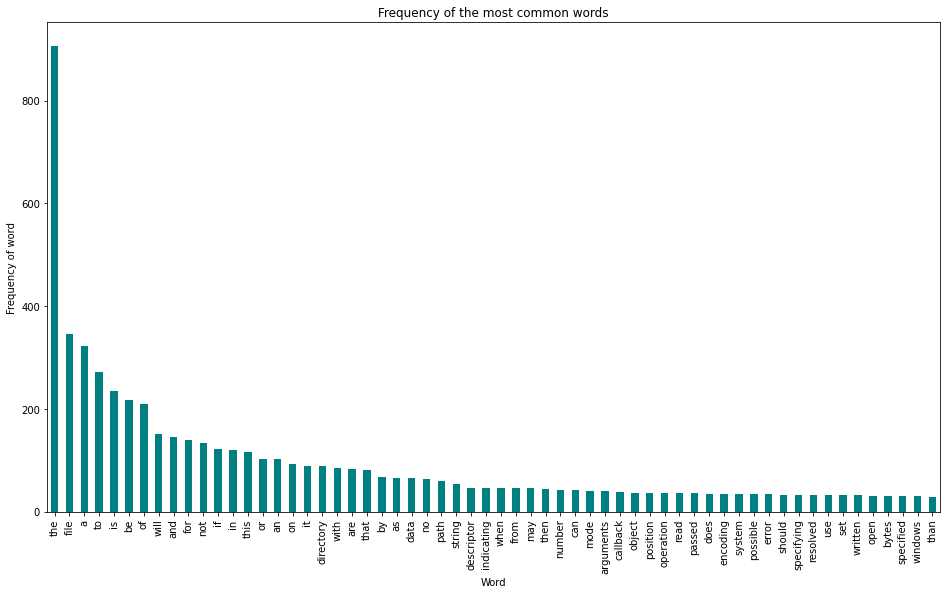

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
count_frame['Count'][:60].plot(kind = 'bar', ax = ax, color='teal')
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

In [18]:
# Get a set of common stopwords from NLTK
nltk.download("stopwords")
from nltk.corpus import stopwords

# remove stopwords from the text
usefulTxt = ' '.join([word for word in txt.split() if word not in (stopwords.words('english'))])
print("\n")
print(usefulTxt)

rints nodejsdotruncatecatchconsoleerrorthe last three bytes null bytes compensate overtruncationfilehandleutimesatime mtimeatimenumberstringdatemtimenumberstringdatereturns promisechange file system timestamps object referenced thefilehandlethen resolves thepromisewith arguments upon successthis function work aix versions resolve thepromisewith error using codeuvenosysfilehandlewritebuffer offset length positionbufferbufferuintarrayoffsetintegerlengthintegerpositionintegerreturns promisewritebufferto filethepromiseis resolved object containing abyteswrittenproperty identifying number bytes written abufferproperty containing reference thebufferwrittenoffsetdetermines part buffer written andlengthis integer specifying number bytes writepositionrefers offset beginning file data written iftypeof position number data written current position see pwriteit unsafe usefilehandlewritemultiple times file without waiting thepromiseto resolved rejected scenario usefscreatewritestreamon linux positi

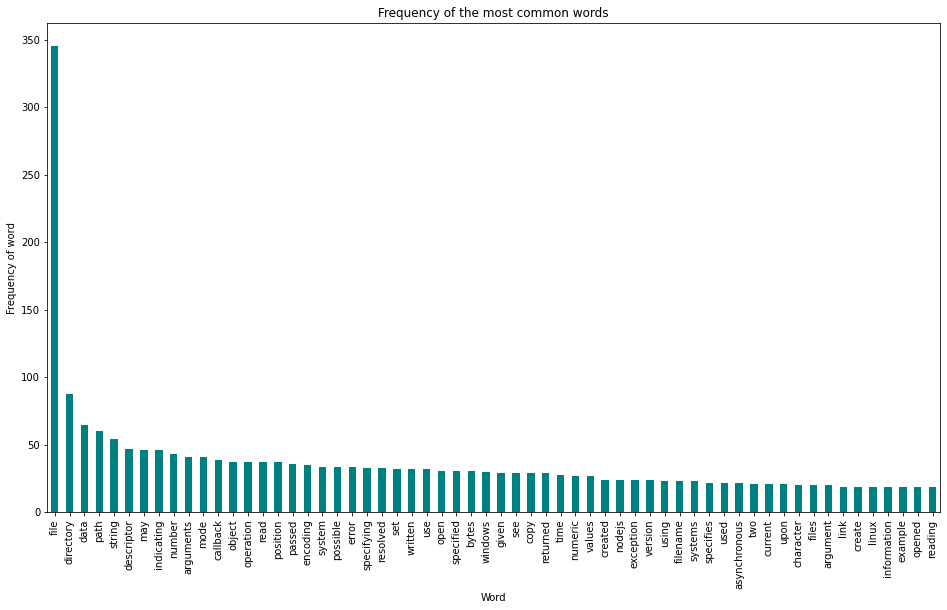

In [19]:
# Get the frequency distribution of the remaining words
usefulWords = nltk.tokenize.word_tokenize(usefulTxt)
fdist = FreqDist(usefulWords)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top 60 words
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color='teal')
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

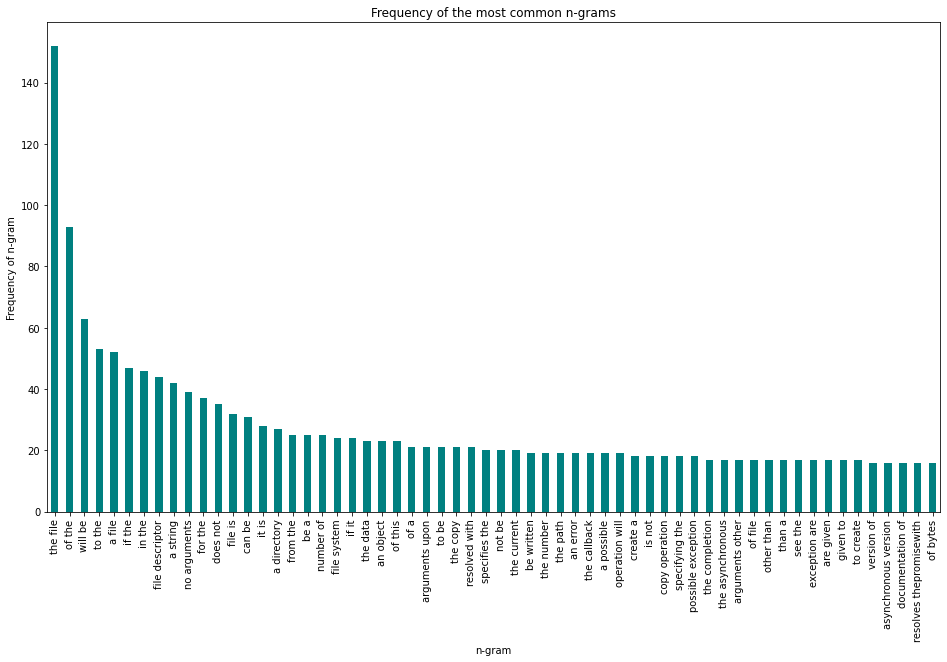

In [20]:
#Extract Bigrams

from nltk import ngrams

# Get n-grams where n = 2
n = 2
nGramsInDoc = []
nGrams = ngrams(words, n)
for grams in nGrams:
    nWords = ' '.join(g for g in grams)
    nGramsInDoc.append(nWords)

# Count the frequency of each n-gram
fdist = FreqDist(nGramsInDoc)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top 60 bigrams
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color='teal')
ax.set_title('Frequency of the most common n-grams')
ax.set_ylabel('Frequency of n-gram')
ax.set_xlabel('n-gram')
plt.show()

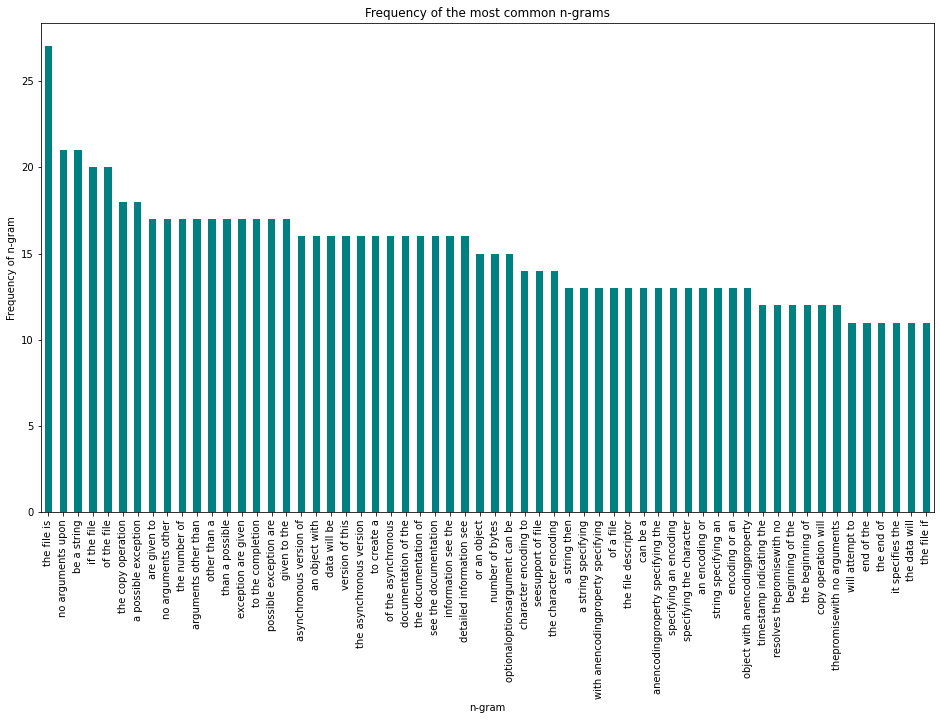

In [21]:
# Extract Trigrams

from nltk import ngrams

# Get n-grams where n = 3
n = 3
nGramsInDoc = []
nGrams = ngrams(words, n)
for grams in nGrams:
    nWords = ' '.join(g for g in grams)
    nGramsInDoc.append(nWords)

# Count the frequency of each n-gram
fdist = FreqDist(nGramsInDoc)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top 60 n-grams
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color='teal')
ax.set_title('Frequency of the most common n-grams')
ax.set_ylabel('Frequency of n-gram')
ax.set_xlabel('n-gram')
plt.show()

In [28]:
# Using Term Frequency - Inverse Document Frequency
import nltk
import pandas as pd
from nltk.probability import FreqDist

# Create a function to calculate TF-IDF
def get_tfidf(term, text, corpus):
    import math
    
    # Calculate TF as term occurrences / terms in text
    wordCount = text.count(term)
    tf = wordCount/len(text)
    
    # Calculate IDF as log(texts in corpus) / texts containing term
    docCount = 0
    for cDoc in corpus:
        if term in cDoc:
            docCount = docCount + 1
    idf = math.log(len(corpus)/docCount)
    
    # Calculate TF-IDF and the product of TF and IDF
    return tf*idf